## Root finding
* A **root** is a solution of an algebraic equation
* We can solve any quadratic function using the quadratic formula
* There are even formulas on cubic functions and quartic functions, although they are not easy to remember or use.
* But for the roots of fiveth or higher order polynomials, there is no formula. 
* Generally, there is also no formula for transcendental equations.
* How are we going to solve these equations?

## Example: the final size of an epidemic
* Consider a disease spreading in a population. A patient becomes infectious for a period of time, then recovers and obtain immunity, so he/she will not be sick again after recovery
* Suppose, if everyone around the patietn is susceptible, a patient infects $\mathcal R_0$ others on average while he/she is infectious
  * This $\mathcal R_0$ is called the basic reproduction number
* What is the fraction $Z$ of the population eventually infected? This $Z$ is called the final epidemic size
  * For a large population of $N$ individuals, what is the probability that a random individual evades the infection a specific patient?
    * The patient infects $\mathcal R_0$ others in the population
    * not counting the patient, there are $N-1$ individuals
    * the probability that the individual is not among the $\mathcal R_0$ infected is thus
    $$ 1-\frac {\mathcal R_0}{N-1}$$
    * This probability is also $1-Z$ 
  * The probability that he/she evades all patients ($ZN$ of them, on average) is thus
$$ 1 - Z = \left(1 -\frac {\mathcal R_0}{N-1}\right)^{ZN}$$
  * As $N\to\infty$,
  $$ 1-Z = e^{-\mathcal R_0 Z}$$
* This simple transcendental equation is called the final size relationship, which links the basic reproduction number $\mathcal R_0$ to the final epidemic size $Z$
* The derivation of this relationship is not relavent to the course, but how to numerically solve the equation is
* If no one is infected in a population, (ignoring imported cases) then the disease will never appear in the population.
  * So, $Z=0$ is always a solutuon.
* Is there a positive solution? If there is, can we find it?
  * Lets plot both sides of the final size relationship
  * We will not go into details of the plotting now, which we will learn later in the course

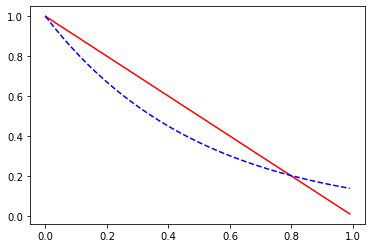

In [6]:
# plotting is provided by the matplotlib package
from matplotlib.pyplot import plot
# range only works for integers we need arange from the numpy module
from numpy import arange
# we also need the exponential function
from math import exp
R0=2
#Z ranges from 0 to (not including 1) step by 0.01
Z = arange(0,1,0.01) # Z = 0, 0.01, 0.02, ..., 0.99
# get the value of the RHS for each Z 
# here we use a for loop, which will be explained later in the course
rhs = [exp(-R0*z) for z in Z]
# this is a MATLAB style plot function, x-coords, y-coords, line style (- and --) and color (r and b)
plot(Z, 1-Z, '-r', Z, rhs, '--b')


* If $\mathcal R_0>1$, there is one unique positive root in the interval $(0,1)$. 
* If $\mathcal R_0\leq 1$, there is no positive root. 

For a specific $\mathcal R_0 >1$, how do we find the root?

## More on the import statement

* Python organizes functionality into modules, both `math` and `scipy` are modules
* Some modules have subpackages, like `constants` in `scipy`
* Python can only use the functionality provided by a module after importing the module
  * After importation, the functions, variables, and other machinaries provided by the module, becomes visible to Python
  * For example, without importing `math`, the math functions such as the aqure root (`sqrt`), `log`, exponential function `exp`, trig functions such as `sin` `cos` etc, are not available.

### Import the whole module
We can import everything from a package, for example, 
```Python
import math
```
Then everything provided my the `math` module is available.
* We can use the functions, constant, variables, and other things by `math`.NAME, where name is the function, variable, or other machinary that we want to use.
* For example, `math.sqrt` gives us the square root function


In [8]:
import math
print(math.sqrt(4))

2.0


The subpackages can also be accessed as `MODULE.SUBPACKAGE`, they can be individually imported as well, for example
```Python
import scipy.constants 
```

### Import a specific name
If we only need a few things from the package, we do not need to import the whole package, we can cherry-pick the things we want to import, using `from PACKAGE import NAME` statement, 

* for example, if we only need the square root function from the `math` module,
```Python
from math import sqrt
```
* We can also give the `sqrt` function another name (possibly to avoid clashing another variable or function named sqrt that we imported or defined earlier
* For example,

In [9]:
from math import sqrt as mysqrt
# now mysqrt is really math.sqrt
print(mysqrt(4))

2.0


### Helps

After importation, you can view what machinaries are provided by the package using the help function.

In [10]:
# help on the math module
# note that we have imported math above
help(math)

Help on module math:

NAME
    math

MODULE REFERENCE
    https://docs.python.org/3.7/library/math
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides access to the mathematical functions
    defined by the C standard.

FUNCTIONS
    acos(x, /)
        Return the arc cosine (measured in radians) of x.
    
    acosh(x, /)
        Return the inverse hyperbolic cosine of x.
    
    asin(x, /)
        Return the arc sine (measured in radians) of x.
    
    asinh(x, /)
        Return the inverse hyperbolic sine of x.
    
    atan(x, /)
        Return the arc tangent (measured in radians) of x.
    
    atan2(y, x, /)
        Return the arc tangent (measured in radians) of y/x.
    

In [11]:
# or help on a specific function
help(math.floor)

Help on built-in function floor in module math:

floor(x, /)
    Return the floor of x as an Integral.
    
    This is the largest integer <= x.



# Root finding in general
We look for the root of a function, $f(x)$, i.e., $f(x)=0$

## The Newton's method
We use the tangent line as an approximation to $f(x)$
  * we pick an initial guess $x_0$
  * at a point $(x_0, f(x_0))$ on the graph of $f(x)$, the tangent line is
  $$ y-f(x_0) = f'(x_0)(x-x_0)$$
  * This tangent line has a root
  $$ x_1 = x_0 - \frac {f(x_0)}{f'(x_0)}$$
  * We hope that this $x_1$ is a better approximation of the true root than $x_0$

## Final size revisited
Lets find the root for the final size relationship for $\mathcal R_0=2$
* We rearrange the final size relationship to the form of $f(Z)=0$:
$$f(Z)=e^{-\mathcal R_0 Z} - 1 + Z$$
* We also need its derivative
$$ f'(Z) = -\mathcal R_0 e^{-\mathcal R_0 Z} + 1$$
* The root is in the interval $(0,1)$, let's pick an initial gues $Z_0=0.5$

In [7]:
# we need the exp function from the math module
from math import exp

# model parameter
R0 = 2
# an initial guess of the root
Z0 = 0.5
# the derivative at Z0
df = -R0*exp(-R0*Z0)+1
# the function value at Z0
f0 = exp(-R0*Z0)-1+Z0
print("f(", Z0, ")=", f0)
Z1 = Z0 - f0/df
f1 = exp(-R0*Z1)-1+Z1
print("Z1 =", Z1, "f(", Z1, ")=", f1)

f( 0.5 )= -0.13212055882855767
Z1 = 1.0 f( 1.0 )= 0.1353352832366127


### Successive approximations
* Here $Z_1=1.0$ is certainly not the root (see the graph) 
* But it is closer to the true root than $Z_0=0.5$
* Can we get a better approximation?
* We start with $Z_1$ as the initial guess, and repeat the process

In [18]:
# the derivative at Z1
df = -R0*exp(-R0*Z1)+1
Z2 = Z1 - f1/df
# the function value at Z2
f2 = exp(-R0*Z2)-1+Z2
print("Z2 =", Z2, ",", "f(", Z2, ")=", Z2)

Z2 = 0.8144387474091372 , f( 0.8144387474091372 )= 0.8144387474091372


* This $Z_2$ is a much better approximation.
* We can repeat again

In [22]:
# the derivative at Z0
df2 = -R0*exp(-R0*Z2)+1
# the function value at Z0
Z3 = Z2 - f2/df2
f3 = exp(-R0*Z3)-1+Z3
print("Z3 =", Z3, "f(", Z3, ")=", f3)

Z3 = 0.7970150777144943 f( 0.7970150777144943 )= 0.00012049141040393341


### Termination condition
* When should we stop the iterative process? We can use **one** of the following conditions
  * when successive approximations do not change much, i.e., $|Z_n-Z_{n-1}|\leq\varepsilon$ for some predetermined precision $\varepsilon$
  * when the function value $f(Z_n)$ is close enough to 0, i.e., $|f(Z_n)|<\varepsilon$ for some predetermined precision $\varepsilon$

If we set $\varepsilon=10^{-3}$, then we can stop at $Z_3$.
  
# The while loop
* Like finding the octal representation of decimal numbers, this iterative process is repetitive, until some condition is met
* Such a repetitive process can be simplified (without writing the process again and again as we did above), using the `while` loop

a while loop has the form
```Python
while condition:
    block
```
where condition is a boolean expression, and block is a list of statements. 
  * Please note the extra space (called the **indentation** infront of the block, to distinguish which statements will be repeated. The statements in the same block must have the same indentation
  * **the colon (:) trailing hte while statement is important**

A while loop execute the block repetitively while the condition is true. If the condition is false, it skips (without executing) the block.

## Example
The following example prints the geometric sequence $a_{n+1}=2a_n$ until $a_n\geq10$ (but including such an $a_n), with $a_0=1$

In [24]:
a=1
while a < 10:
    print(a)
    a = 2 * a
print("stopped")

1
2
4
8
stopped


### Use a while loop to solve the final size relationship
* Let's solve the final size relationship using the while loop, with a termination condition $|f(Z_n)|\leq\varepsilon$, with $\varepsilon = 0.001$
* The repetitive parts are:
  * computing the derivative at $Z_0$
  * compute the function value at $Z_0$
  * compute the next apprximation
    * which will be used as the initial guess again in the next iteration, so we store it in $Z_0$ to replace the original initial guess 

In [25]:
# we need the absolute value function (fabs) from the math package
from math import fabs
R0 = 2
Z0 = 0.5
# the final error in f(Z)
epsilon = 1e-3

# function value
f = exp(-R0*Z0)-1+Z0
while abs(f) >= epsilon :
    df = -R0 * exp(-R0*Z0) + 1
    # the function value is computed before in f
    Z0 = Z0 - f / df
    # compute the function value at the new estimate
    f = exp(-R0*Z0) - 1 + Z0
print("Z=", Z0, ", f(", Z0, ")=", f)


Z= 0.7970150777144943 , f( 0.7970150777144943 )= 0.00012049141040393341
